# AIVANCITY : Coding for AI and Data Science
Marie Couvé - confidential

Your name :Likhita Yerra

## Lecture 7 : Neural Networks


**Don't forget to comment everything you code and analyze your results**

## The dataset : MNIST

MNIST is a classical dataset used for classification in Machine Learning and Neural Networks.

MNIST is a dataset of images of handwritten digits. We want to identify which number is on each image.


### Start by importing the librairies


In [2]:

import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.nn import softmax, relu


### Useful functions

In [3]:
# Function to display the images
def display_image(X, y, n, label=False):
  plt.figure(figsize=(20,2))
  for i in range(n):
      ax = plt.subplot(1, n, i+1)
      plt.imshow(X[i],cmap=plt.cm.binary)
      if label:
          plt.title("Digit: {}".format(y[i]))
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

In [4]:
# Function to display the images with multiple dimensions
def display_image_ndim(X, y, n, label=False):
  depth = X.shape[3]
  fig, axs = plt.subplots(nrows=depth, ncols=n, figsize=(n*2, depth*2))
  for i in range(n):
    for d in range(depth):
      axs[d,i].imshow(X[i][:,:,d],cmap=plt.cm.binary)
      axs[d,i].axis('off')
    if label:
      axs[0,i].title.set_text("Digit: {}".format(y[i]))
  plt.show()

## Use TensorFlow to design and train a neural network



### Step 1: Data preparation

#### 1.1 Import data

In [5]:
# Import mnist data from tensorflow
mnist = tf.keras.datasets.mnist
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### 1.2 Explore data

In [6]:
# What's the shape of the data?
# How many examples in each set?
print(f'X_train: {X_train.shape}') #we have 60000 examples here
print(f'y_train: {y_train.shape}') #we have 60000 examples here
print(f'X_test: {X_test.shape}') #we have 10000 examples here
print(f'y_test: {y_test.shape}') #we have 10000 examples here


X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


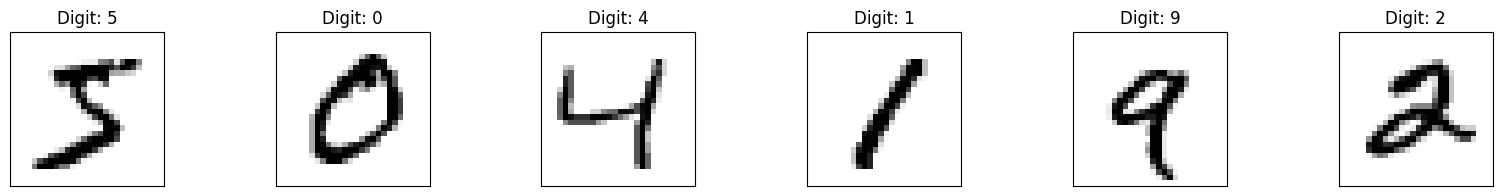

None


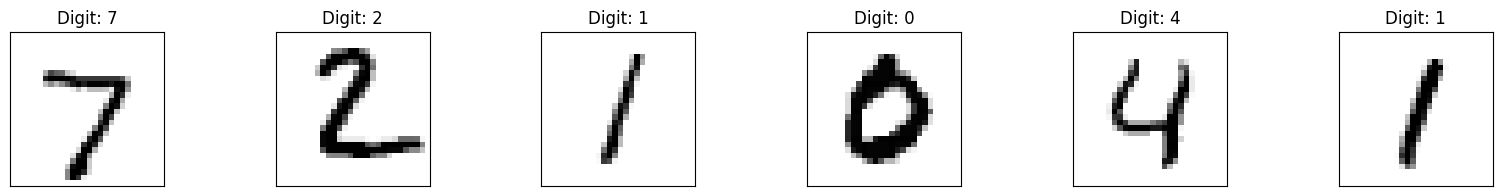

None


In [7]:
# Use the display_image function to display some images of your dataset
# Are they similar in the test and train data?
print(display_image(X_train, y_train, 6, True))
print(display_image(X_test, y_test, 6, True))
#these pictures are different

In [8]:
# Explore the repartition of data in each classes in training data
# Compter le nombre d'occurrences de chaque classe
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Créer un diagramme à barres interactif avec Plotly
fig = px.bar(x=unique_classes, y=class_counts, labels={'x': 'Class', 'y': 'Number'},
             title='The repartition of data in each classes in training data')

fig.show()

In [9]:
# Explore the repartition of data in each classes in test data
# Is the repartition similar in train and test data?
unique_classes1, class_counts1 = np.unique(y_test, return_counts=True)

# Créer un diagramme à barres interactif avec Plotly
fig = px.bar(x=unique_classes1, y=class_counts1, labels={'x': 'Class', 'y': 'Number'},
             title='The repartition of data in each classes in test data')

fig.show()
#The repartition is not similar in train and test

#### 1.3 Prepare data

The pixels values are between 0 and 255.

Usually, we want data values between 0 and 1.

Let's normalize our data!

In [10]:
# Normalize data by dividing each values by 255
X_train= X_train/255
X_test = X_test/255

In [11]:
# Reshape input data, each sample should be (28x28x1)
import keras
from keras.utils import to_categorical
X_train=X_train.reshape(60000, 28, 28, 1)
X_test=X_test.reshape(10000, 28, 28, 1)

num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

## Model 1: neural network

### Step 2 : NN training

For the first neural network, we want a simple architecture:

1. Input layer : flatten layer to reshape the input images into 1D vectors
2. Hidden layer : dense layer
3. Output layer : dense layer with the right number of neurons

For the optimizer, I suggest using Adam which is a great choice is most cases.

For the loss, look at the documentation to choose the right cross entropy:
- binary_categorical_crossentropy : https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy
- categorical_crossentropy : https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy
- sparse_categorical_crossentropy : https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy


In [12]:
# Create your neural network
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units = 512, activation= 'relu'))
model.add(Dense(units = num_categories, activation= 'softmax'))

In [13]:
# Compile your neural network
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))

In [14]:
# Check the architecture of your model with model.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Train your model
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1998 - accuracy: 0.9427
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0790 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0511 - accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0360 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0271 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0219 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0164 - accuracy: 0.9946
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0138 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0117 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step 

### Step 3 : NN evaluation

In [16]:
# Plot the loss and accuracy evolution over the epochs on the train and test set
loss_curve=history.history['loss']
accuracy_curve=history.history['accuracy']

fig = px.line(loss_curve, title='loss')
fig.show()

fig1 = px.line(accuracy_curve, title = 'accuracy')
fig1.show()

In [17]:
# Compute the final loss and accuracy of the model
loss_final, accuracy_final = model.evaluate(X_test, y_test)

# Print the final loss and accuracy
print(f'Final Loss: {loss_final:.4f}')
print(f'Final Accuracy: {accuracy_final * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9827
Final Loss: 0.0710
Final Accuracy: 98.27%


In [18]:
# Inference : use the model to predict labels on the test set
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
print(X_test.shape)

(10000, 28, 28, 1)


1/1 [==============================] - 0s 21ms/step


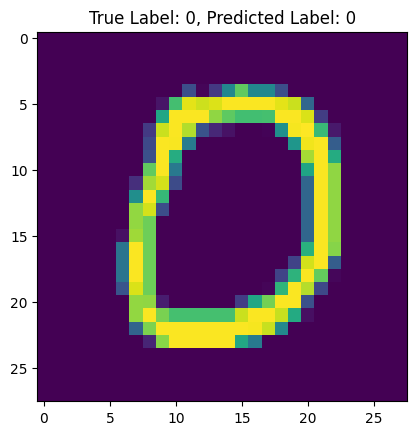

In [20]:
# Choose an example in the test dataset
# Display the image, the true label and the predicted label

example_index = 10
example_image = X_test[example_index]

prédictions = model.predict(np.expand_dims(example_image, axis=0))
predicted_label = np.argmax(prédictions)

# Get the true label for the chosen example
true_label = np.argmax(y_test[example_index])

# Display the image, true label, and predicted label
plt.imshow(example_image)
plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
plt.show()

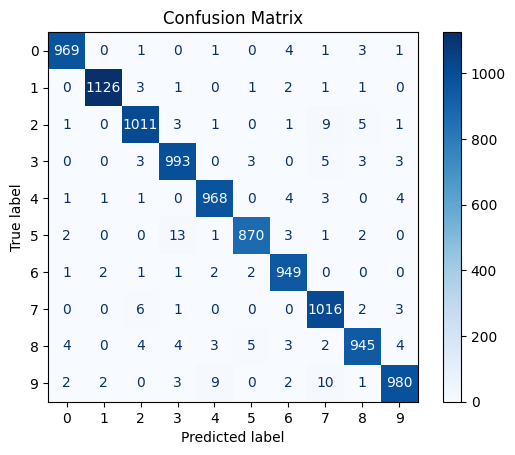

In [21]:
# Compute and plot the confusion matrix
# What can you analyse?
from sklearn.metrics import ConfusionMatrixDisplay

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
# Compute confusion matrix
cm = confusion_matrix(y_test_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()
#Analyzing the confusion matrix can provide insights into which classes the model tends to confuse and how well it performs overall. Adjustments to the model, such as tuning hyperparameters or collecting more data for certain classes, can be considered based on the analysis.

## Model 2: Convolutional neural network

### Explore the different kinds of layers

#### Convolutional layer

https://keras.io/api/layers/convolution_layers/convolution2d/

Output shape :
- W = Winput - kernel_size + 1
- H = Hinput - kernel_size + 1
- D = filters

In [22]:
# Create a convolutional layer and apply it to X_test
# What is the input and output shape?
convolutional_layer = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
output_data = convolutional_layer(X_test)
print("Input shape:", X_test.shape)
print("Output shape:", output_data.shape)


Input shape: (10000, 28, 28, 1)
Output shape: (10000, 26, 26, 32)


1/1 [==============================] - 0s 33ms/step


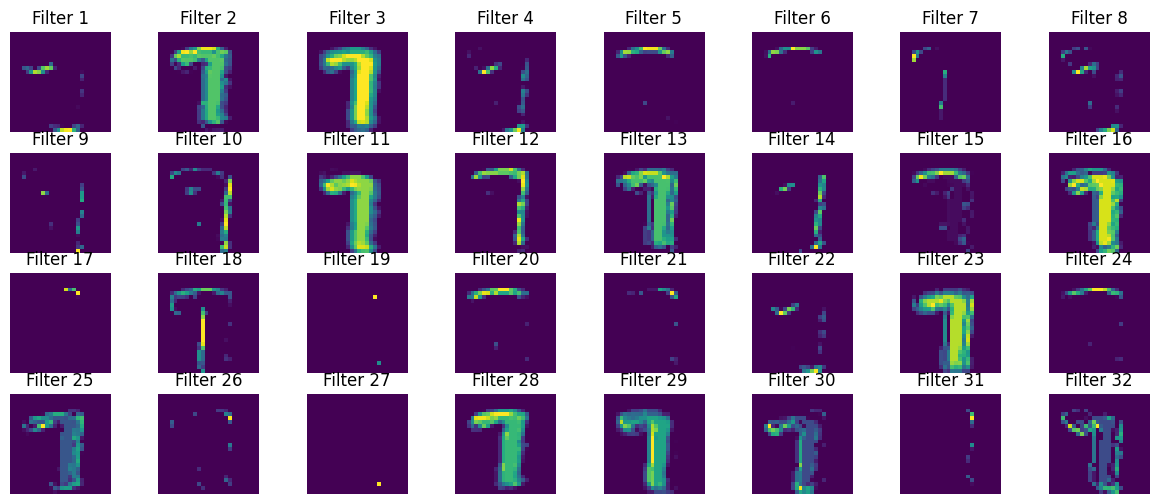

In [23]:
# Use the display_image_ndim function to display the different feature maps
# Apply the convolutional layer to X_test

# Create a model for visualization
model_for_visualization = Sequential()
model_for_visualization.add(convolutional_layer)

# Compile the model (needed for visualization)
model_for_visualization.compile()

# Apply the convolutional layer to X_test
output_data = model_for_visualization.predict(X_test)

# Define a function to display feature maps
def display_feature_maps(input_image, model, cmap='viridis'):
    intermediate_output = model.predict(input_image)

    num_filters = intermediate_output.shape[-1]

    plt.figure(figsize=(15, 6))
    for i in range(num_filters):
        plt.subplot(4, 8, i + 1)
        plt.imshow(intermediate_output[0, :, :, i], cmap=cmap)
        plt.title(f'Filter {i+1}')
        plt.axis('off')

    plt.show()

# Choose a random example from the test set
random_index = np.random.randint(0, len(X_test))
sample_image = X_test[random_index].reshape(1, 28, 28, 1)

# Display feature maps for the chosen example
display_feature_maps(sample_image, model_for_visualization)

##### Analysis
*What is happening? What can you observe?*
The number is well visible depending on the filter

#### Max Pooling

1/1 [==============================] - 0s 21ms/step


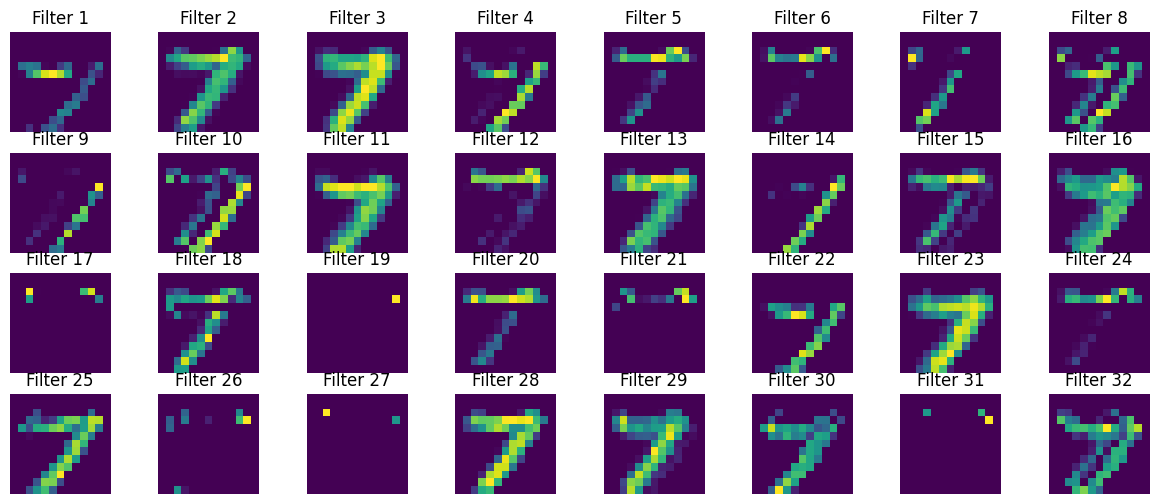

In [24]:
# Create a max pooling layer and apply it to the output of the previous layer
# What is the input and output shape?
# Create a max pooling layer
max_pooling_layer = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))

# Create a model for visualization
model_for_visualization = tf.keras.models.Sequential()
model_for_visualization.add(convolutional_layer)
model_for_visualization.add(max_pooling_layer)

# Compile the model (needed for visualization)
model_for_visualization.compile()

# Apply the model to X_test
output_data = model_for_visualization.predict(X_test)

# Define a function to display feature maps
def display_feature_maps(input_image, model, cmap='viridis'):
    intermediate_output = model.predict(input_image)

    num_filters = intermediate_output.shape[-1]

    plt.figure(figsize=(15, 6))
    for i in range(num_filters):
        plt.subplot(4, 8, i + 1)
        plt.imshow(intermediate_output[0, :, :, i], cmap=cmap)
        plt.title(f'Filter {i+1}')
        plt.axis('off')

    plt.show()

# Choose a random example from the test set
random_index = np.random.randint(0, len(X_test))
sample_image = X_test[random_index].reshape(1, 28, 28, 1)

# Display feature maps for the chosen example
display_feature_maps(sample_image, model_for_visualization)

Feature maps after convolution:
1/1 [==============================] - 0s 20ms/step


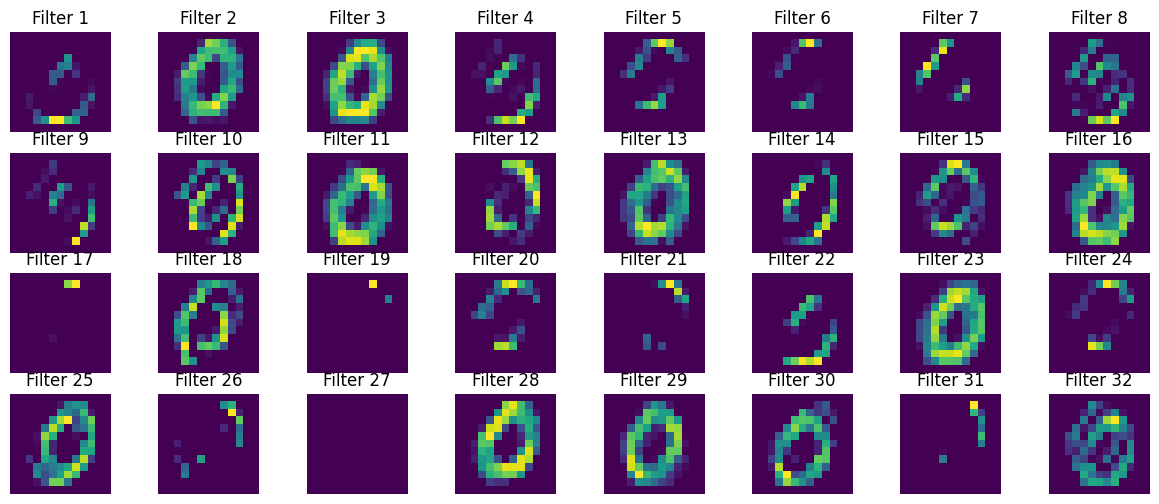

In [25]:
# Use the display_image_ndim function to display the different feature maps
# Choose a random example from the test set
random_index = np.random.randint(0, len(X_test))
sample_image = X_test[random_index].reshape(1, 28, 28, 1)

# Display feature maps for the chosen example after convolution
print("Feature maps after convolution:")
feature_maps_conv = model_for_visualization.predict(sample_image)

# Display each feature map individually
plt.figure(figsize=(15, 6))
for i in range(feature_maps_conv.shape[-1]):
    plt.subplot(4, 8, i + 1)
    plt.imshow(feature_maps_conv[0, :, :, i], cmap='viridis')
    plt.title(f'Filter {i+1}')
    plt.axis('off')

plt.show()

##### Analysis
*What is happening? What can you observe?*
well visible

### Step 2 : NN training

Train the CNN and analyse the results

In [26]:
# Instantiate a model
model = Sequential()

# CNN
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', padding='Same', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(strides=(2,2)))
model.add(Dropout(0.25))

# Classifier
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=10, activation='softmax'))


In [27]:
# Compile your neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [28]:
# Check the architecture of your model with model.summary()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              6423552   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                      

In [29]:
from keras.models import Sequential
from keras.layers import Dense

# Example Sequential model architecture
model = Sequential()
model.add(Dense(64, input_shape=(100,), activation='relu'))  # Adding a Dense layer
model.add(Dense(10, activation='softmax'))  # Adding the output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check the output shape of the last layer in the model
if model.layers:
    output_shape = model.layers[-1].output_shape
    print(output_shape)
else:
    print("The model has no layers yet.")


(None, 10)


### Step 3 : NN evaluation

You can reuse the evaluation you did for the Model 1.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

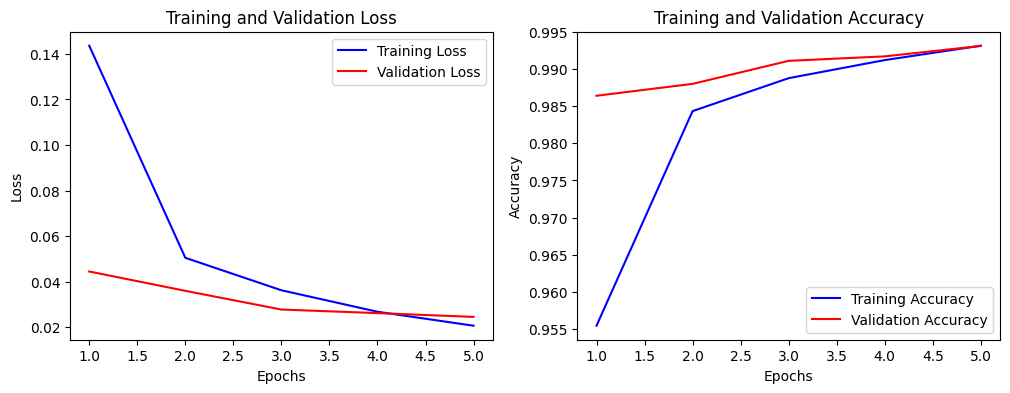

313/313 [==============================] - 3s 8ms/step - loss: 0.0245 - accuracy: 0.9931
Final Test Loss: 0.0245
Final Test Accuracy: 99.31%


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to between 0 and 1

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Train the model with validation data
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=5, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test))

# Plot the loss and accuracy evolution over the epochs on the train and validation set
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute the final loss and accuracy of the model
final_loss, final_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print(f"Final Test Loss: {final_loss:.4f}")
print(f"Final Test Accuracy: {final_accuracy*100:.2f}%")


In [32]:
# Inference: use the model to predict labels on the test set
predictions = model.predict(X_test.reshape(-1, 28, 28, 1))


313/313 [==============================] - 5s 15ms/step


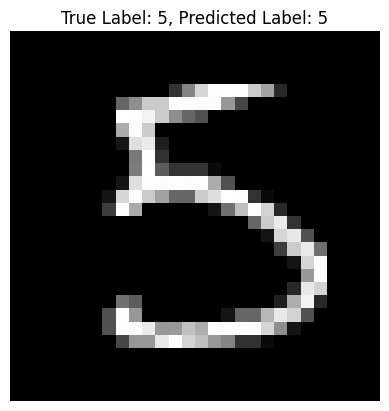

In [33]:
# Choose an example in the test dataset
example_index = 15  # You can change this to any index you want to visualize
example_image = X_test[example_index]
true_label = y_test[example_index]
predicted_label = np.argmax(predictions[example_index])

# Display the image, true label, and predicted label
plt.imshow(example_image, cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


<Figure size 800x800 with 0 Axes>

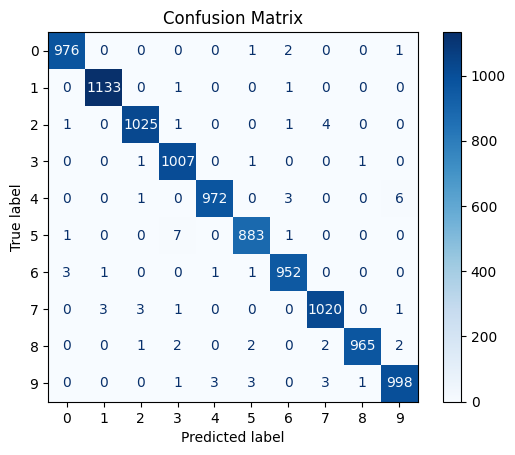

In [34]:
# Compute and plot the confusion matrix
confusion = confusion_matrix(y_test, np.argmax(predictions, axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
ConfusionMatrixDisplay(confusion, display_labels=np.arange(10)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()#good performance

## Bonus : Define your own neural network

Define, train and evaluate your neural network.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

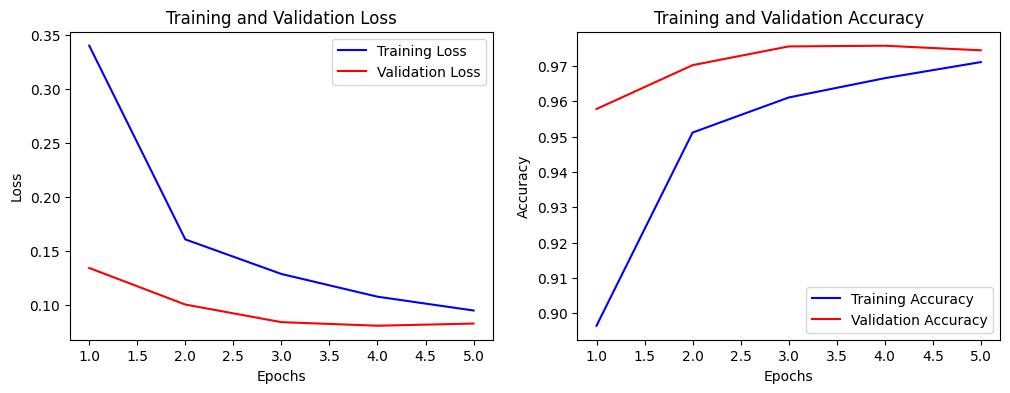

313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9744
Test Loss: 0.0828
Test Accuracy: 97.44%


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to between 0 and 1

# Define your own neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # First hidden layer with 128 units and ReLU activation
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),   # Second hidden layer with 64 units and ReLU activation
    Dropout(0.2),
    Dense(10, activation='softmax')  # Output layer with 10 units for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Plot the loss and accuracy evolution over the epochs on the train and validation set
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
